In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from hummingbird.ml import convert, load

In [2]:
def loadNpy(filename):
    with open(os.getcwd() + "/train-val-test/"+ filename, "rb") as f: return np.load(f)
    
def postMetrics(true, preds, fname):
    print("MSE: " + str(metrics.mean_squared_error(true, y_pred)))
    print("Accuracy: " + str(metrics.accuracy_score(true, y_pred)))
    print(confusion_matrix(true, y_pred))
    print()
    saveMetrics(true, preds, fname)
    
def saveMetrics(true, preds, fname):
    with open(f"{os.getcwd()}/train-val-test/{db}{fname}.txt", "w") as f:
        cm = confusion_matrix(true, preds)
        cm_str = "["
        a,b = cm.shape
        for i in range(a):
            cm_str += " "*i + "["
            for j in range(b):
                cm_str += str(cm[i,j]) 
                if j != b-1: cm_str += ", "
            cm_str += "]"
            if i != a-1 : cm_str += "\n"
        cm_str += "]"
        fdata = f"MSE: {metrics.mean_squared_error(true, preds)}\nACC: {metrics.accuracy_score(true, preds)}\n{cm_str}"
        
        f.write(fdata)

In [3]:
db = "db14/window-size-10/lag2/"
data_type = ""

In [4]:
X_train, X_val, X_test = loadNpy(db + f"X{data_type}_train.npy"), loadNpy(db + f"X{data_type}_val.npy"), loadNpy(db + f"X{data_type}_test.npy")
y_train, y_val, y_test = loadNpy(db + f"y{data_type}_train.npy"), loadNpy(db + f"y{data_type}_val.npy"), loadNpy(db + f"y{data_type}_test.npy")

In [5]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
lr = LinearRegression()

### Regression

In [69]:
lr.fit(X_train, y_train)
thr = 0

y_pred = [1 if p >= thr else 0 for p in lr.predict(X_val)]
y_actual = [1 if y >= thr else 0 for y in y_val]

postMetrics(y_actual, y_pred)

y_pred = [1 if p >= thr else 0 for p in lr.predict(X_test)]
y_actual = [1 if y >= thr else 0 for y in y_test]

postMetrics(y_actual, y_pred)

TypeError: postMetrics() missing 1 required positional argument: 'fname'

In [59]:
lr.fit(X_train, [1 if y >= 0 else 0 for y in y_train])


y_pred = [1 if p >= 0.5 else 0 for p in lr.predict(X_val)]
y_actual = [1 if y >= 0.5 else 0 for y in y_val]

postMetrics(y_actual, y_pred)


y_pred = [1 if p >= 0.5 else 0 for p in lr.predict(X_test)]
y_actual = [1 if y>= 0.5 else 0 for y in y_test]

postMetrics(y_actual, y_pred)

0.33885694811133416
0.8851759687166726
[[4635  150]
 [ 496  345]]
0.3375430348726538
0.8860646996089584
[[4669  140]
 [ 501  316]]


In [7]:
y_pred = [1 if p >= thr else 0 for p in lr.predict(X_val)]
y_actual = [1 if y >= thr else 0 for y in y_val]

### Classification

In [33]:
lr.fit(X_train, y_train)


y_pred = [1 if p >= 0.5 else 0 for p in lr.predict(X_val)]

postMetrics(y_val, y_pred, "lr-val")

y_pred = [1 if p >= 0.5 else 0 for p in lr.predict(X_test)]

postMetrics(y_test, y_pred, "lr-test")

MSE: 0.11310654463823173
Accuracy: 0.8868934553617682
[[4820  140]
 [ 515  316]]

MSE: 0.11414263512346745
Accuracy: 0.8858573648765325
[[4818  158]
 [ 503  312]]



## SVM

In [18]:
from sklearn import svm

### Regression

In [61]:
regr = svm.SVR()
regr.fit(X_train, y_train)


y_pred = [1 if p >= 0.5 else 0 for p in regr.predict(X_val)]
y_actual = [1 if y >= 0 else 0 for y in y_val]

postMetrics(y_actual, y_pred)

y_pred = [1 if p >= 0.5 else 0 for p in regr.predict(X_test)]
y_actual = [1 if y >= 0 else 0 for y in y_test]

postMetrics(y_actual, y_pred)

0.3333037076537358
0.888908638464273
[[4620  165]
 [ 460  381]]
0.3396428562750863
0.8846427301813011
[[4637  172]
 [ 477  340]]


In [64]:
clf = svm.SVC()
clf.fit(X_train, [1 if y >= 0 else 0 for y in y_train])


y_pred = [1 if p >= 0.5 else 0 for p in clf.predict(X_val)]
y_actual = [1 if y >= 0 else 0 for y in y_val]

postMetrics(y_actual, y_pred)


y_pred = [1 if p >= 0.5 else 0 for p in clf.predict(X_test)]
y_actual = [1 if y >= 0 else 0 for y in y_test]

postMetrics(y_actual, y_pred)

0.33463426666737645
0.8880199075719872
[[4652  118]
 [ 512  344]]
0.34354543003154087
0.8819765375044436
[[4663  124]
 [ 540  299]]


### Classification

In [34]:
clf = svm.SVC()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_val)

postMetrics(y_val, y_pred, "svc-val")


y_pred = clf.predict(X_test)

postMetrics(y_test, y_pred, "svc-test")

MSE: 0.07943360386807115
Accuracy: 0.9205663961319288
[[4882   78]
 [ 382  449]]

MSE: 0.07736142289759973
Accuracy: 0.9226385771024003
[[4903   73]
 [ 375  440]]



#### Visualizing Test Cases

In [60]:
j = 5

In [61]:
x0 = X_test[j,:]
y0 = y_test[j]
yp0 = lr.predict(x0.reshape(1,-1))

ecg = np.zeros((130))

offset = 0
for i in range(10):
    ecg[i*13:i*13+13] = x0[i*89:i*89 + 13]

[0.55546758]
1


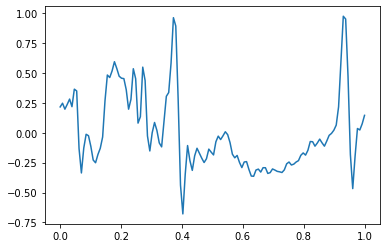

In [62]:
plt.plot(np.linspace(0,1,130), (ecg-np.mean(ecg))/np.max(np.abs(ecg)))
print(yp0)
print(y0)

In [35]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=20000)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

postMetrics(y_val, y_pred, "sgd-val")


y_pred = clf.predict(X_test)

postMetrics(y_test, y_pred, "sgd-test")

MSE: 0.11483336211362459
Accuracy: 0.8851666378863754
[[4894   66]
 [ 599  232]]

MSE: 0.11086168192022103
Accuracy: 0.8891383180797789
[[4914   62]
 [ 580  235]]



In [21]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

postMetrics(y_val, y_pred, "gp-val")


y_pred = clf.predict(X_test)

postMetrics(y_test, y_pred, "gp-test")

KeyboardInterrupt: 

In [36]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

postMetrics(y_val, y_pred, "gnb-val")


y_pred = clf.predict(X_test)

postMetrics(y_test, y_pred, "gnb-test")

MSE: 0.16750129511310655
Accuracy: 0.8324987048868935
[[4317  643]
 [ 327  504]]

MSE: 0.17337247452944224
Accuracy: 0.8266275254705577
[[4321  655]
 [ 349  466]]



In [37]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

postMetrics(y_val, y_pred, "gnb-val")


y_pred = clf.predict(X_test)

postMetrics(y_test, y_pred, "gnb-test")

MSE: 0.13866344327404592
Accuracy: 0.8613365567259541
[[4948   12]
 [ 791   40]]

MSE: 0.13762735278881022
Accuracy: 0.8623726472111898
[[4962   14]
 [ 783   32]]



In [7]:
from sklearn.neural_network import MLPClassifier
nn_size = (600,500,400,500,600)
clf = MLPClassifier(hidden_layer_sizes=nn_size)
clf.fit(X_train, y_train)

#mod = convert(clf, "pytorch")
#mod.to("cuda")

MLPClassifier(hidden_layer_sizes=(600, 500, 400, 500, 600))

In [8]:
y_pred = clf.predict(X_val)

postMetrics(y_val, y_pred, f"mlp2-{nn_size}-val")


y_pred = clf.predict(X_test)

postMetrics(y_test, y_pred, f"mlp2-{nn_size}-test")

MSE: 0.07770678639267829
Accuracy: 0.9222932136073217
[[4849  111]
 [ 339  492]]

MSE: 0.0742531514418926
Accuracy: 0.9257468485581074
[[4855  121]
 [ 309  506]]



In [7]:
X_train.shape

(17370, 910)

In [8]:
2*910/3

606.6666666666666